In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Function to load and preprocess the dataset
def load_data(data_dir, img_height, img_width, num_categories):
    X, y = [], []
    categories = sorted(os.listdir(data_dir))

    for category_idx, category in enumerate(categories):
        category_path = os.path.join(data_dir, category)
        for filename in os.listdir(category_path):
            img_path = os.path.join(category_path, filename)
            img = cv2.imread(img_path)

            if img is None or img.size == 0:
                print(f"Warning: Failed to load or empty image at '{img_path}'. Skipping.")
                continue

            # Resize images to a fixed size
            img = cv2.resize(img, (img_height, img_width))

            X.append(img)
            y.append(category_idx)

    X = np.array(X)
    y = np.array(y)

    # Convert labels to one-hot encoding
    y = to_categorical(y, num_categories)

    return X, y


# Define dataset path and image dimensions
data_dir = 'F:\\plantvillage dataset\\color'
img_height, img_width = 224, 224
num_categories = 38

# Load and preprocess the dataset
X, y = load_data(data_dir, img_height, img_width, num_categories)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_categories, activation='softmax'))

model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 20
batch_size = 32

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')


Epoch 1/20
1222/1222 [==============================] - 1222s 998ms/step - loss: 4.5448 - accuracy: 0.1855 - val_loss: 2.6636 - val_accuracy: 0.2545
Epoch 2/20
1222/1222 [==============================] - 1145s 937ms/step - loss: 1.7937 - accuracy: 0.4980 - val_loss: 1.1762 - val_accuracy: 0.6446
Epoch 3/20
1222/1222 [==============================] - 1132s 927ms/step - loss: 1.0939 - accuracy: 0.6769 - val_loss: 0.9273 - val_accuracy: 0.7220
Epoch 4/20
1222/1222 [==============================] - 963s 788ms/step - loss: 0.7481 - accuracy: 0.7724 - val_loss: 0.6434 - val_accuracy: 0.8078
Epoch 5/20
1222/1222 [==============================] - 957s 783ms/step - loss: 0.5515 - accuracy: 0.8324 - val_loss: 0.6672 - val_accuracy: 0.8094
Epoch 6/20
1222/1222 [==============================] - 954s 780ms/step - loss: 0.4560 - accuracy: 0.8600 - val_loss: 0.6798 - val_accuracy: 0.8076
Epoch 7/20
1222/1222 [==============================] - 952s 779ms/step - loss: 0.3727 - accuracy: 0.8891 - v

In [9]:
model.save('F:\\plantvillage dataset.h5')

In [24]:
from tensorflow import expand_dims, newaxis

def predict(model, img):
    
    img_array = img.numpy()
    img_array = expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = labels[np.argmax(predictions[0])]
    confidence = round( (np.max(predictions[0])), 2)
    
    return predicted_class, confidence

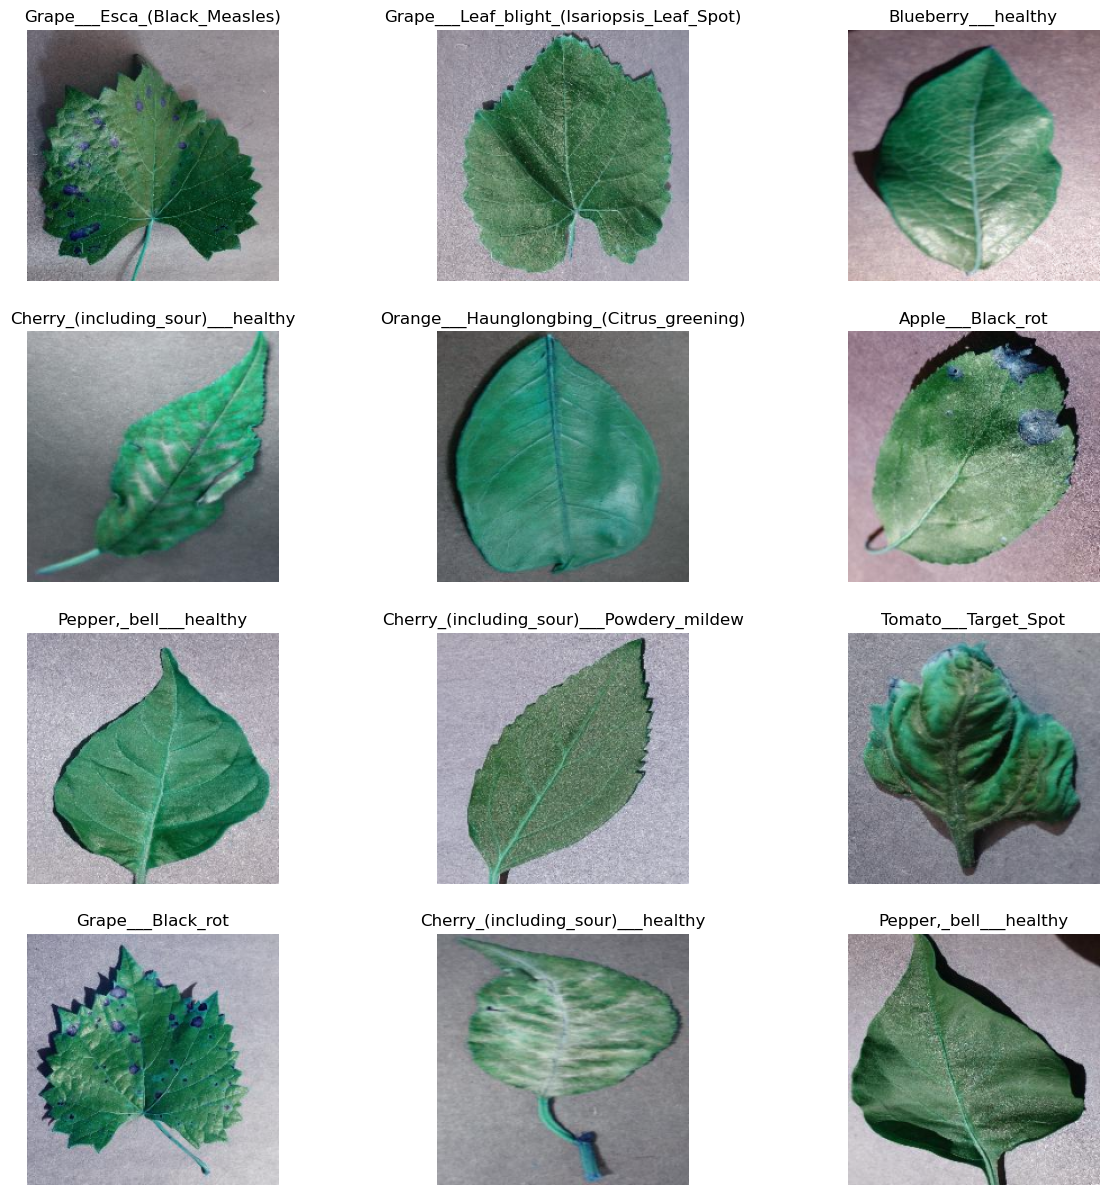

In [31]:
import numpy as np
import matplotlib.pyplot as plt


class_names = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']  # Replace with your actual class names

# Create a subplot with 3 rows and 3 columns for 9 images
plt.figure(figsize=(15, 15))
for i in range(12):
    plt.subplot(4, 3, i+1)
    
    # Get the image and corresponding label
    img = X_train[i]
    label_idx = np.argmax(y_train[i])  # Get the index of the one-hot encoded label
    label_name = class_names[label_idx]  # Get the corresponding class name 
    
    # Display the image and label
    plt.imshow(img)
    plt.title(label_name)  # Set the title to the class name 
    plt.axis('off')  # Hide the axis labels

plt.show()


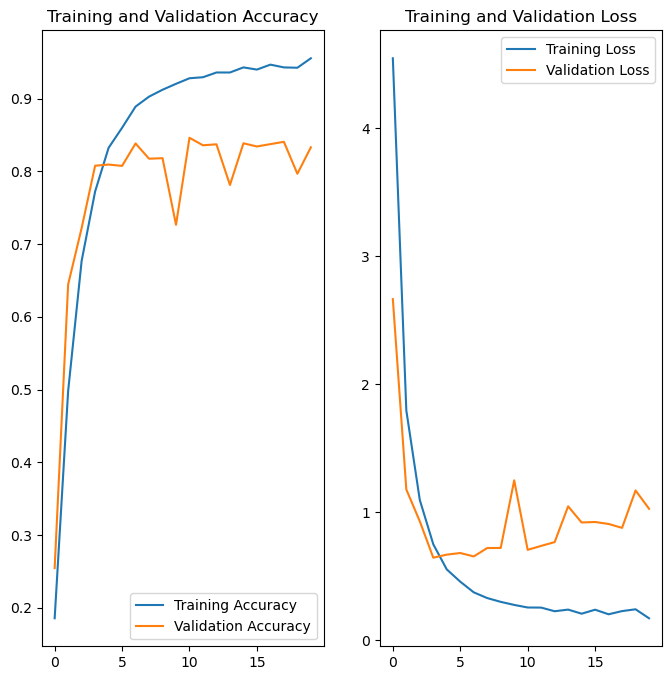

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


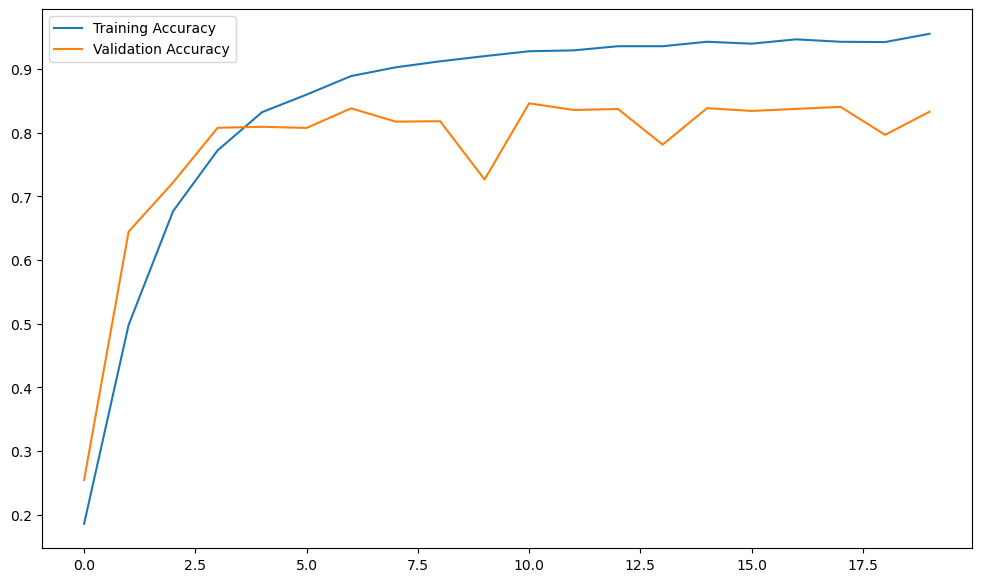

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
no_of_epochs = history.params['epochs']
len(history.history['accuracy']) == no_of_epochs
plt.figure(figsize=(12, 7))

plt.plot(range(no_of_epochs), acc, label='Training Accuracy')
plt.plot(range(no_of_epochs), val_acc, label='Validation Accuracy')

plt.legend()
plt.show()

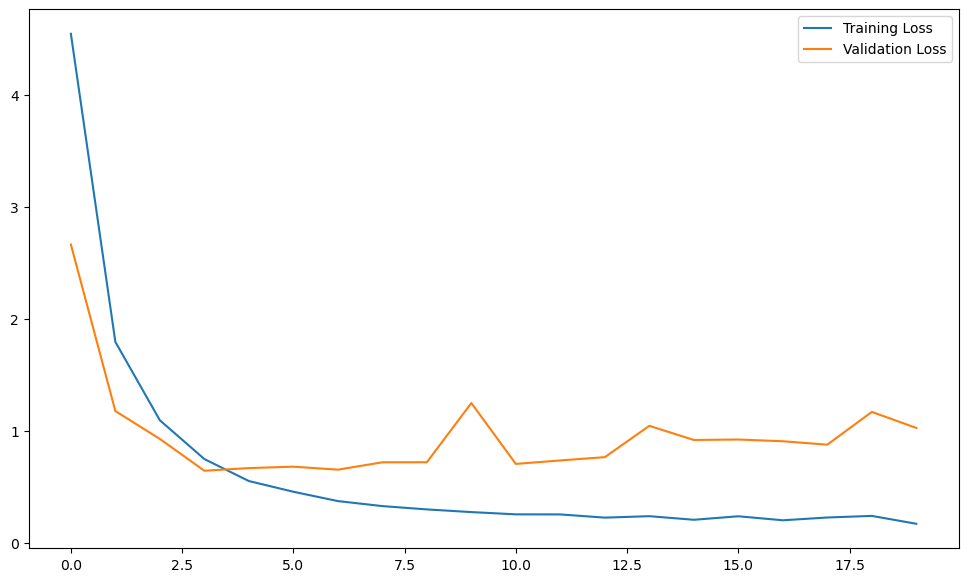

In [38]:
plt.figure(figsize=(12, 7))

plt.plot(range(no_of_epochs), loss, label='Training Loss')
plt.plot(range(no_of_epochs), val_loss, label='Validation Loss')

plt.legend()
plt.show()

1/1 [==============================] - 0s 151ms/step


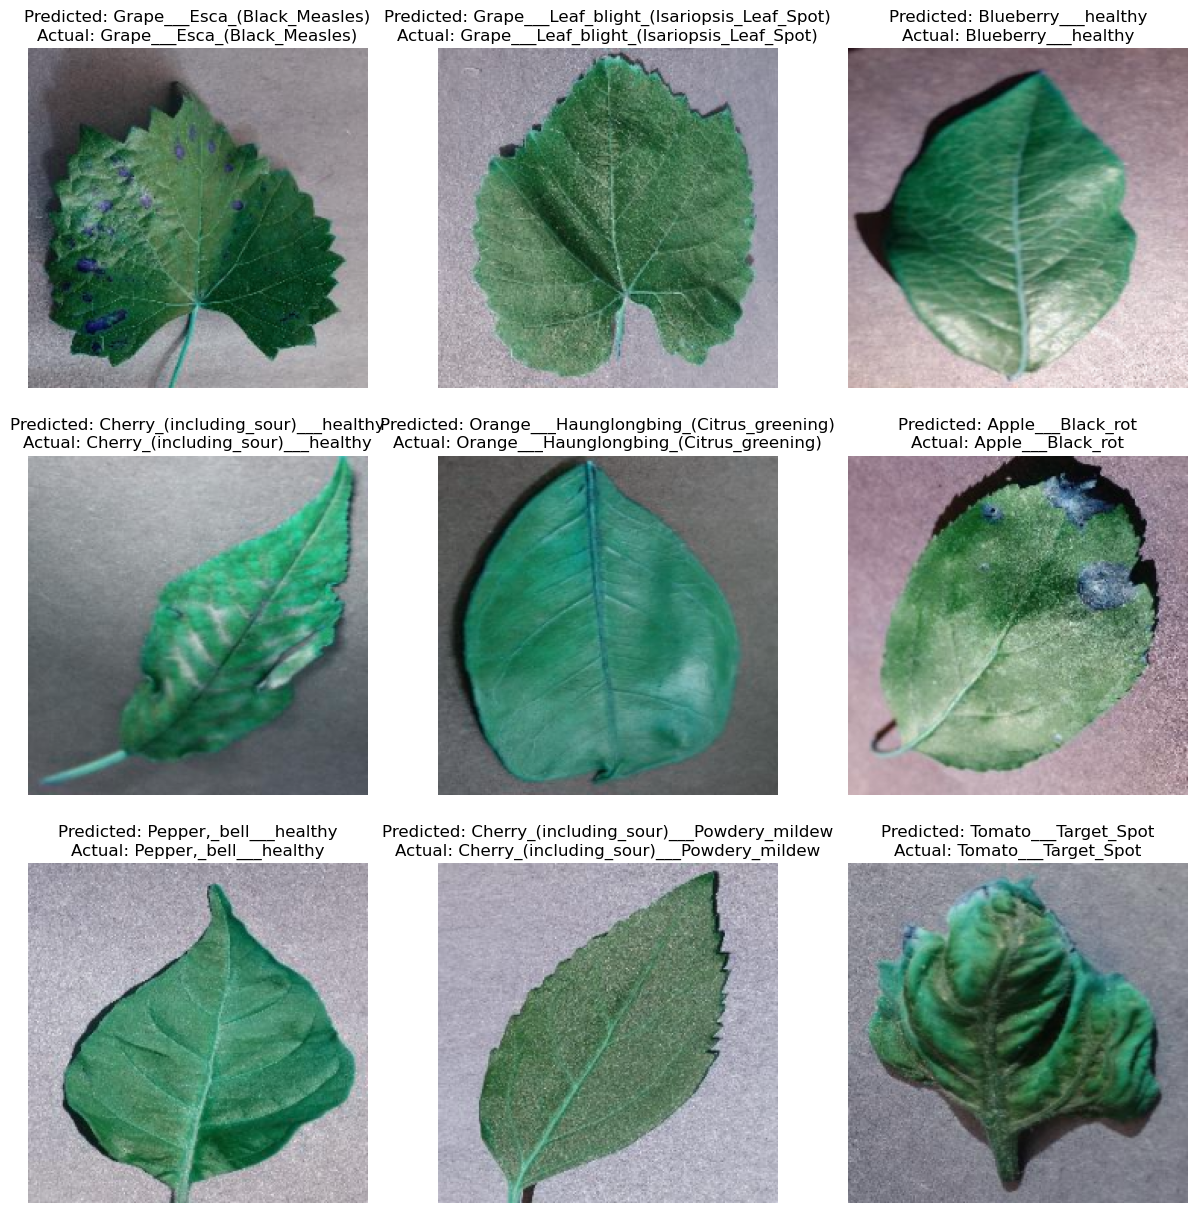

In [76]:
import numpy as np
import matplotlib.pyplot as plt



class_names = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']  # Replace with your actual class names


# Get the predicted class indices for the batch of images
predicted_indices = np.argmax(model.predict(X_train[:batch_size]), axis=1)

# Map the class indices to class names
predicted_labels = [class_names[idx] for idx in predicted_indices]

# Get the actual labels from one-hot encoded vectors
actual_indices = np.argmax(y_train[:batch_size], axis=1)
actual_labels = [class_names[idx] for idx in actual_indices]

# Display the images with their predicted and actual labels
num_images = min(batch_size, 9) 
plt.figure(figsize=(15, 15))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i])
    plt.title(f"Predicted: {predicted_labels[i]}\nActual: {actual_labels[i]}")
    plt.axis('off')

plt.show()


In [ ]:
model.save("Model.h5")